In [5]:
#Illustration of the dependence of bias and variance on model complexity, governed by a regularization parameter λ in ridge regression using synthetic data (create_toy_data)
#The top row corresponds to a large value of the regularization coefficient λ that gives low variance 
#(because the curves in the left plot look similar) but high bias 
#(because the two curves in the right plot are very different). 
#Conversely on the bottom row, for which λ is small, there is large variance (shown by the high variability between the curves in the left plot) 
#but low bias (shown by the good fit between the average model fit and the original sinusoidal function)

import numpy as np
import matplotlib.pyplot as plt

def func(x):
    fmax = np.sqrt((207 + 33**1.5)/128)
    return (np.sin(2 * np.pi * x) + np.sin(4 * np.pi * x))/fmax

def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def build_design_matrix_gauss(x,means,var):
  W = np.zeros((len(x),len(means)))
  for k in range(len(means)):
    for i in range(len(x)):
      gauss = np.exp((-0.5 * (x[i] - means[k]) ** 2) / var)
      W[i,k] = gauss
  return W  

def build_design_matrix_sigmoid(x,means,s):
  W = np.zeros((len(x),len(means)))
  for k in range(len(means)):
    for i in range(len(x)):
      sigmoidal = 1/(1+np.exp(-(x[i]-means[k])/s))
      W[i,k] = sigmoidal
  return W  

def build_design_matrix_poly(x,degree):
  W = np.zeros((len(x),degree+1))
  powers_list = list(range(degree+1))
  for k in range(len(powers_list)):
    for i in range(len(x)):
      polynomial = x[i]**powers_list[k]
      W[i,k] = polynomial 
  return W 

class RidgeRegression(object):
  def __init__(self, regcoeff):
    self.regcoeff=regcoeff

  def fit(self, W, t):
    eye = np.eye(np.size(W,1))
    self.w = np.linalg.solve(self.regcoeff*eye+W.T@W, W.T@t)

  def predict(self, W):
    return W @ self.w

#creating 100 datasets with 25 points each 
D = []
for j in range(100):
  dataset = create_toy_data(func,25,0.33)
  D.append(dataset)

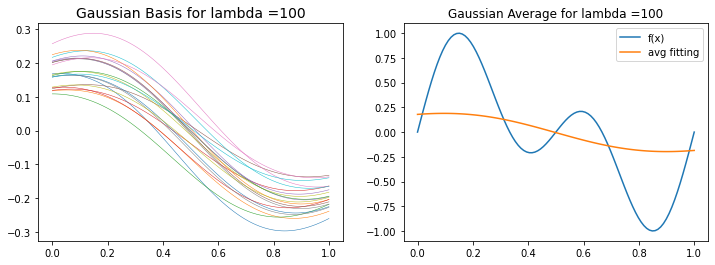

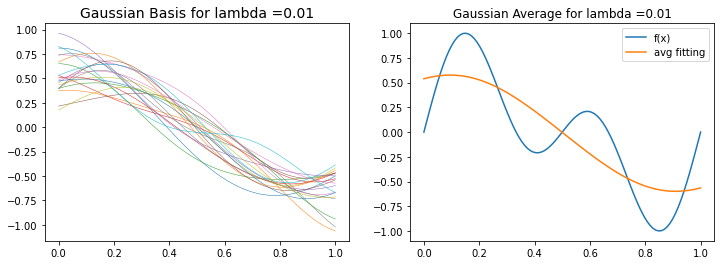

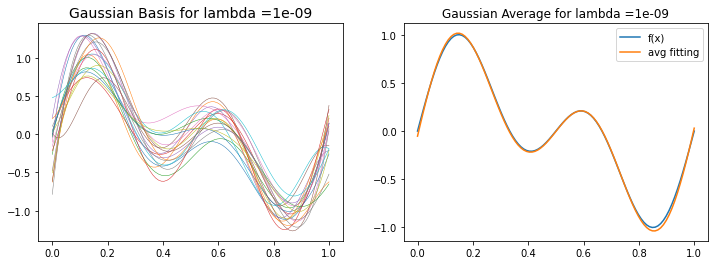

In [2]:
lamda_list = [100,1e-2,1e-9]
for lamda in lamda_list: 
  y_list = []
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  for i in range(len(D)):
      var = 0.1
      s = 10
      degree = 24
      x_train, y_train = D[i]
      x_test = np.linspace(0, 1, 100)
      y_test = func(x_test) 
      means = np.linspace(0, 1, 24)
      model = RidgeRegression(lamda)
      X_train = build_design_matrix_gauss(x_train,means,var)
      model.fit(X_train,y_train)
      X_test = build_design_matrix_gauss(x_test,means,var)
      y_fit = model.predict(X_test)
      y_list.append(y_fit)
      if i < 20:
          plt.plot(x_test, y_fit, linewidth = 0.5)
          plt.title(r'Gaussian Basis for lambda =' + str(lamda), fontsize=14)          
  plt.subplot(1,2,2)
  plt.plot(x_test,y_test,label = 'f(x)')
  plt.plot(x_test,np.asarray(y_list).mean(axis=0), label = 'avg fitting')
  plt.legend(loc = 'best')
  plt.title(r'Gaussian Average for lambda =' + str(lamda))

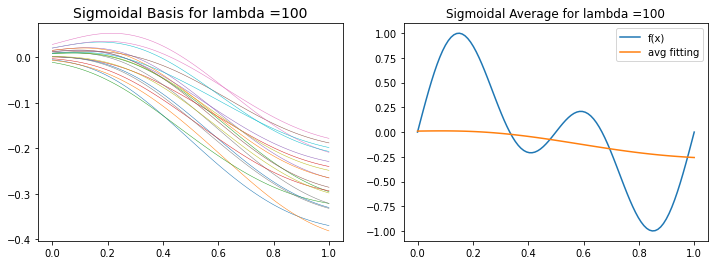

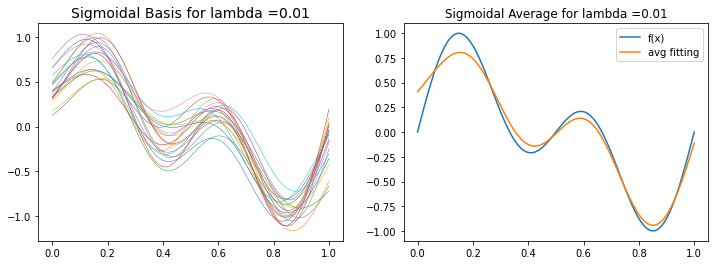

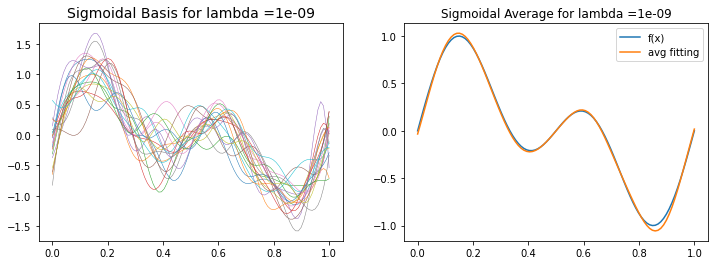

In [3]:
lamda_list = [100,1e-2,1e-9]
for lamda in lamda_list: 
  y_list = []
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  for i in range(len(D)):
      var = 0.1
      s = 0.1 #s = 10 is just giving straight lines
      degree = 24
      x_train, y_train = D[i]
      x_test = np.linspace(0, 1, 100)
      y_test = func(x_test) 
      means = np.linspace(0, 1, 24)
      model = RidgeRegression(lamda)
      X_train = build_design_matrix_sigmoid(x_train,means,s)
      model.fit(X_train,y_train)
      X_test = build_design_matrix_sigmoid(x_test,means,s)
      y_fit = model.predict(X_test)
      y_list.append(y_fit)
      if i < 20:
          plt.plot(x_test, y_fit, linewidth = 0.5)
          plt.title(r'Sigmoidal Basis for lambda =' + str(lamda), fontsize=14)          
  plt.subplot(1,2,2)
  plt.plot(x_test,y_test,label = 'f(x)')
  plt.plot(x_test,np.asarray(y_list).mean(axis=0),label = 'avg fitting')
  plt.legend(loc = 'best')
  plt.title(r'Sigmoidal Average for lambda =' + str(lamda))

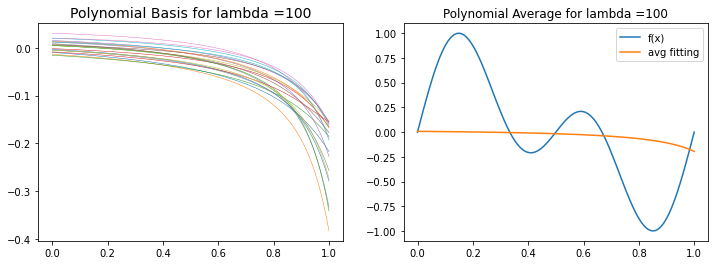

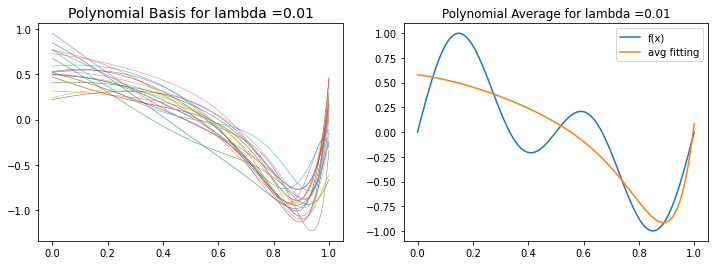

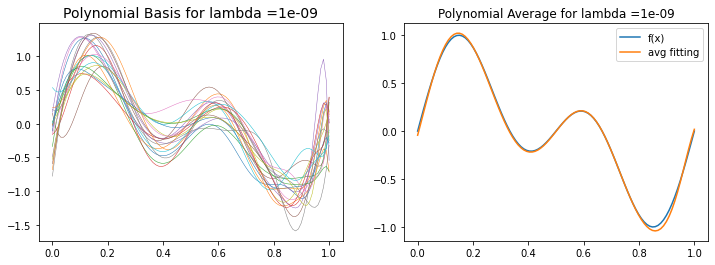

In [4]:
lamda_list = [100,1e-2,1e-9]
for lamda in lamda_list: 
  y_list = []
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  for i in range(len(D)):
      var = 0.1
      s = 10
      degree = 24
      x_train, y_train = D[i]
      x_test = np.linspace(0, 1, 100)
      y_test = func(x_test) 
      means = np.linspace(0, 1, 24)
      model = RidgeRegression(lamda)
      X_train = build_design_matrix_poly(x_train,degree)
      model.fit(X_train,y_train)
      X_test = build_design_matrix_poly(x_test,degree)
      y_fit = model.predict(X_test)
      y_list.append(y_fit)
      if i < 20:
          plt.plot(x_test, y_fit, linewidth = 0.5)
          plt.title(r'Polynomial Basis for lambda =' + str(lamda), fontsize=14)          
  plt.subplot(1,2,2)
  plt.plot(x_test,y_test,label = 'f(x)')
  plt.plot(x_test,np.asarray(y_list).mean(axis=0),label = 'avg fitting')
  plt.legend(loc='best')
  plt.title(r'Polynomial Average for lambda =' + str(lamda))
